Imports

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile(r"../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('2. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns

Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Goalkeeper name', 'Goalkeeper Club', 'Goalkeeper \nheight (cm)',
       'Thrower \nheight (cm)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition','goalKeeperName', 
              'goalkeeperTeam','goalKeeperHeightCM','shooterheightCM',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'goalKeeperName':'string','goalkeeperTeam':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,...,goalkeeperTeam,goalKeeperHeightCM,shooterheightCM,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,10.0,NaN,5.0,3.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,3.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,15.0,NaN,8.0,4.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,9.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,34.0,NaN,15.0,14.0,NaN,...,EHV Aue,185.0,180.0,0.0,1.0,2.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,39.0,NaN,18.0,17.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,8.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,43.0,NaN,19.0,19.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,7.0,0.0,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,22.0,35.0,7.0,7.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,3.0,0.0,3.0,8.0,1.0
223,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,36.0,28.0,14.0,12.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,0.0,1.0,2.0,1.0,4.0,3.0,1.0
224,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,39.0,26.0,15.0,14.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,1.0,1.0,9.0,4.0,5.0,2.0,0.0
225,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,50.0,97.0,21.0,17.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,6.0,3.0,6.0,9.0,1.0


Summary

In [4]:
throwSummary = df['throwSuccess'].copy()
throwSummary.replace(1.0, 'Success',inplace=True)
throwSummary.replace(0.0, 'Fail',inplace=True)
throwSummary.replace(2.0, 'Im Nachwurf',inplace=True)
throwSummary.dropna(inplace=True)
throwSummary
throwSummary =pd.DataFrame(throwSummary.value_counts(normalize=True)*100)
throwSummary.columns = ['ThrowSummary%']
throwSummary.to_clipboard()
throwSummary

,ThrowSummary%
Success,80.645161
Fail,16.666667
Im Nachwurf,2.688172


In [5]:
ps = df['pressureSituation'].copy()
ps.dropna(inplace=True)
X_ps = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']
for i,s in enumerate(X_ps):
    ps.replace(i, s,inplace=True)

ps =pd.DataFrame(ps.value_counts(normalize=True)*100)
ps.columns = ['PressureSituationSummary%']
ps

,PressureSituationSummary%
No Pressure Situation,59.239130
GoalKeeperChange,14.673913
GoalDiffLessEqualTo4After50MinPlay,10.326087
LastThrowFailed,8.152174
GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay,3.804348
GoalKeeperChange-LastThrowFailed,1.630435
FirstInNachWurf,1.086957
LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay,1.086957


Teamwise Throw stats

,team,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
0,TUSEM Essen,120,85,15,70.833333
2,ThSV Eisenach,94,64,13,68.085106
1,TV Emsdetten,13,6,3,46.153846


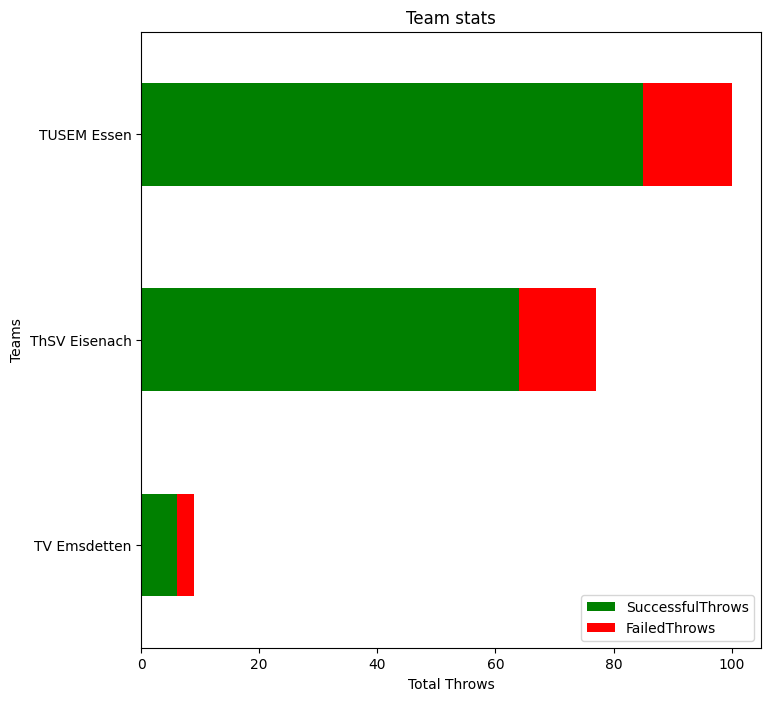

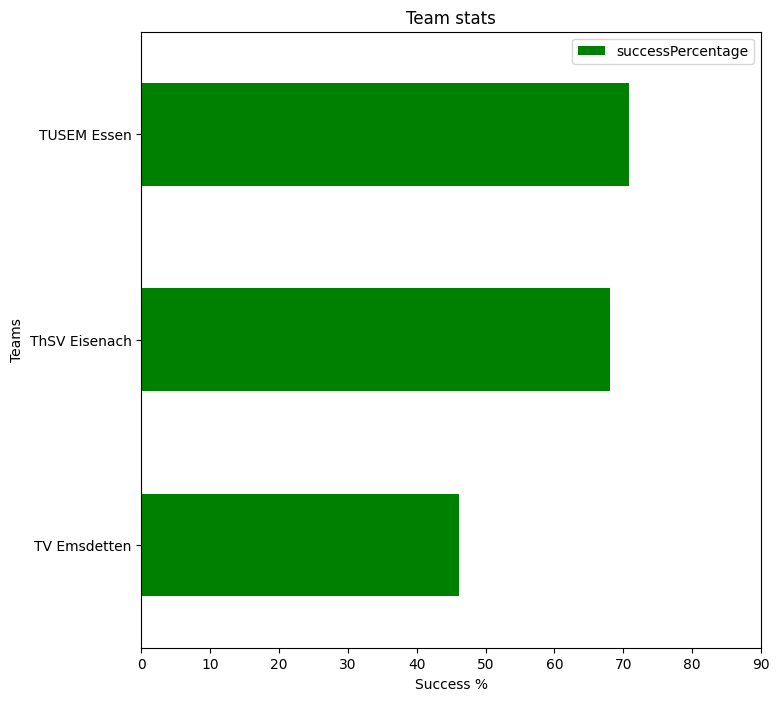

In [6]:
# Teamwise Throw stats
df2 = df.groupby(['team'])['team'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['team'])['team'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['team'])['team'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='team')
df5 = pd.merge(df5,df4,on='team')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
display(df5.sort_values('successPercentage',ascending=False))
df5.sort_values('TotatlThrows',ascending=True).set_index('team')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(8,8) )

ax = df5.sort_values('successPercentage',ascending=True).set_index('team')[['successPercentage']].plot.barh( title='Team stats',color=("green", "red"),xlabel='Success %', ylabel='Teams',figsize=(8,8),xticks=range(0,100,10) )
#ax.bar_label(ax.containers[0])

Team & player wise Throw stats

In [7]:
# Team & player wise Throw stats
df6 = df.groupby(['team','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['team','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['team','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['team','name'],right_on=['team','name'],  how='left')
df9 = df9.merge(df8,left_on=['team','name'],right_on=['team','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df9.sort_values('successPercentage',ascending=False))

,team,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
2,ThSV Eisenach,Fynn Hangstein,77,64,13,83.116883
0,TUSEM Essen,Noah Beyer,103,85,15,82.524272
1,TV Emsdetten,Dirk Holzner,9,6,3,66.666667


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
1,Fynn Hangstein,77,64,13,83.116883
2,Noah Beyer,103,85,15,82.524272
0,Dirk Holzner,9,6,3,66.666667


<Axes: title={'center': 'Player stats'}, xlabel='Success %', ylabel='Player'>

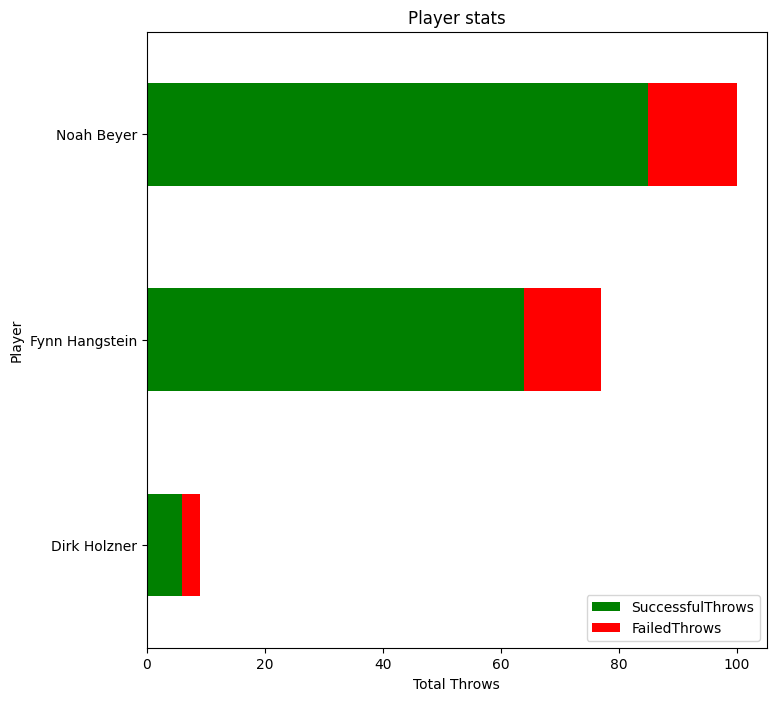

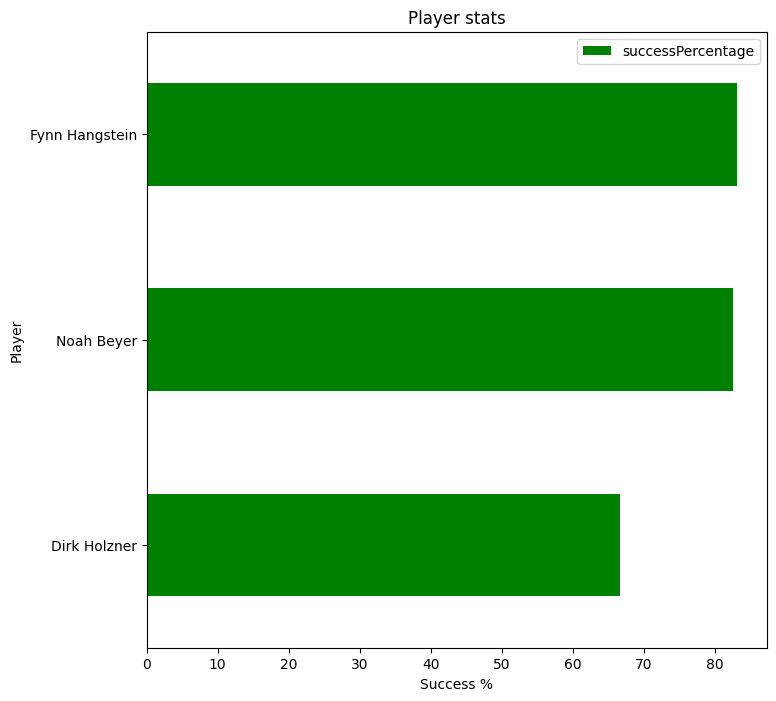

In [8]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
df13.set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

df13.sort_values('successPercentage',ascending=True).set_index('name')[['successPercentage']].plot.barh( title='Player stats',color=("green", "red"),xlabel='Success %', ylabel='Player',figsize=(8,8) )

Throw Success based on lastTrow Success

145
bothSuccess: 108
bothFailed: 2
failedButLastSuccess: 23
successButLastFailed: 12
------------------------------
bothNachwurf: 0
successLastNachwurf: 3
failedLastNachwurf: 0


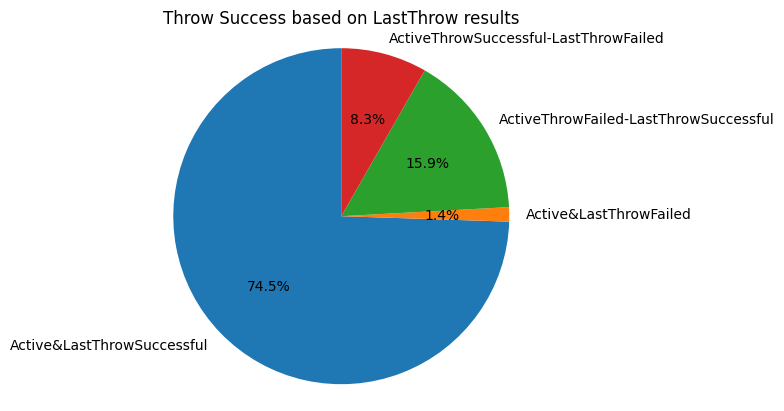

In [9]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

labels = ['Active&LastThrowSuccessful','Active&LastThrowFailed','ActiveThrowFailed-LastThrowSuccessful','ActiveThrowSuccessful-LastThrowFailed']
values = [bothSuccess,bothFailed,failedButLastSuccess,successButLastFailed]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Throw Success based on LastThrow results')
plt.show()

Throw analysis fo L-R players

In [10]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))



noOfThrowsFromR: 186
noOfThrowsFromL: 0
------------------
successR: 155
successL: 0
failedR: 31
failedL: 0
----------------------
%successR: 83.33333333333334
%successL: nan


C:\Users\Nayan\AppData\Local\Temp\ipykernel_15160\287796995.py:26: RuntimeWarning: invalid value encountered in scalar divide
  print('%successL: '+ str((successL/noOfThrowsFromL)*100))


Throw Analysis based on pressure situation

                                    pressureSituation  throwSuccess  Count
0                               No Pressure Situation           0.0     20
1                               No Pressure Situation           1.0     89
2                                    GoalKeeperChange           0.0      6
3                                    GoalKeeperChange           1.0     21
4                                     LastThrowFailed           0.0      2
5                                     LastThrowFailed           1.0     13
6                  GoalDiffLessEqualTo4After50MinPlay           0.0      2
7                  GoalDiffLessEqualTo4After50MinPlay           1.0     17
8                    GoalKeeperChange-LastThrowFailed           1.0      3
9   GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           1.0      7
10  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           0.0      1
11  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           1.0      1
12                       

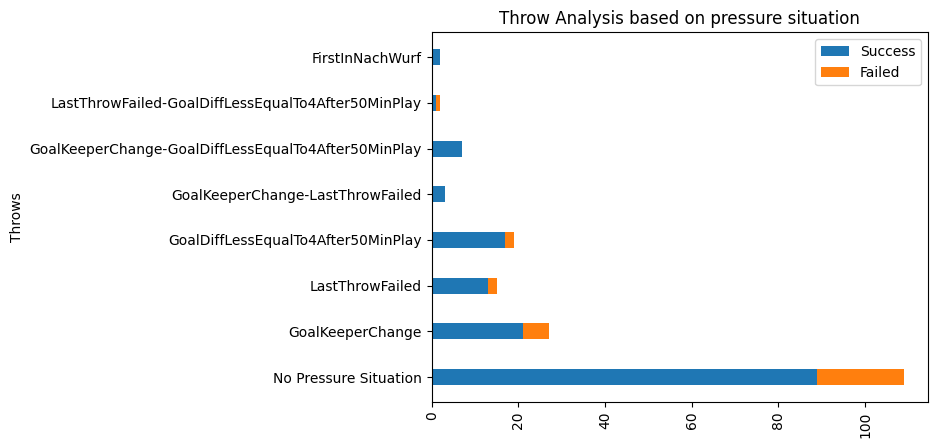

,pressureSituation,throwSuccess,Count
0,No Pressure Situation,0.0,20
1,No Pressure Situation,1.0,89
2,GoalKeeperChange,0.0,6
3,GoalKeeperChange,1.0,21
4,LastThrowFailed,0.0,2
5,LastThrowFailed,1.0,13
6,GoalDiffLessEqualTo4After50MinPlay,0.0,2
7,GoalDiffLessEqualTo4After50MinPlay,1.0,17
8,GoalKeeperChange-LastThrowFailed,1.0,3
9,GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...,1.0,7


In [11]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16['throwSuccess'].replace(2,1, inplace=True)
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')


X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)


print(df16)
grp = df16['pressureSituation'].unique()
s = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 1.0)]
     if tempdf.empty:
          s.append(0.0)
     else:
          s.append(tempdf.iloc[0,2])
f = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 0.0)]
     if tempdf.empty:
          f.append(0)
     else:
          f.append(tempdf.iloc[0,2])
t = list()
for g in grp:
     t.append(df16[(df16.pressureSituation == g)]['Count'].sum())


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(grp, s, width,  label='Success')
ax.barh(grp, f, width,  left=s,
       label='Failed')

ax.set_ylabel('Throws')
#ax.set_xscale('log')
ax.set_title('Throw Analysis based on pressure situation')
ax.legend()
plt.xticks(rotation=90)
plt.show()
display(df16)

,PressureSituation,successPercentage
0,No Pressure Situation,81.651376
1,GoalKeeperChange,77.777778
2,LastThrowFailed,86.666667
3,GoalDiffLessEqualTo4After50MinPlay,89.473684
4,GoalKeeperChange-LastThrowFailed,100.000000
5,GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...,100.000000
6,LastThrowFailed-GoalDiffLessEqualTo4After50Min...,50.000000
7,FirstInNachWurf,100.000000


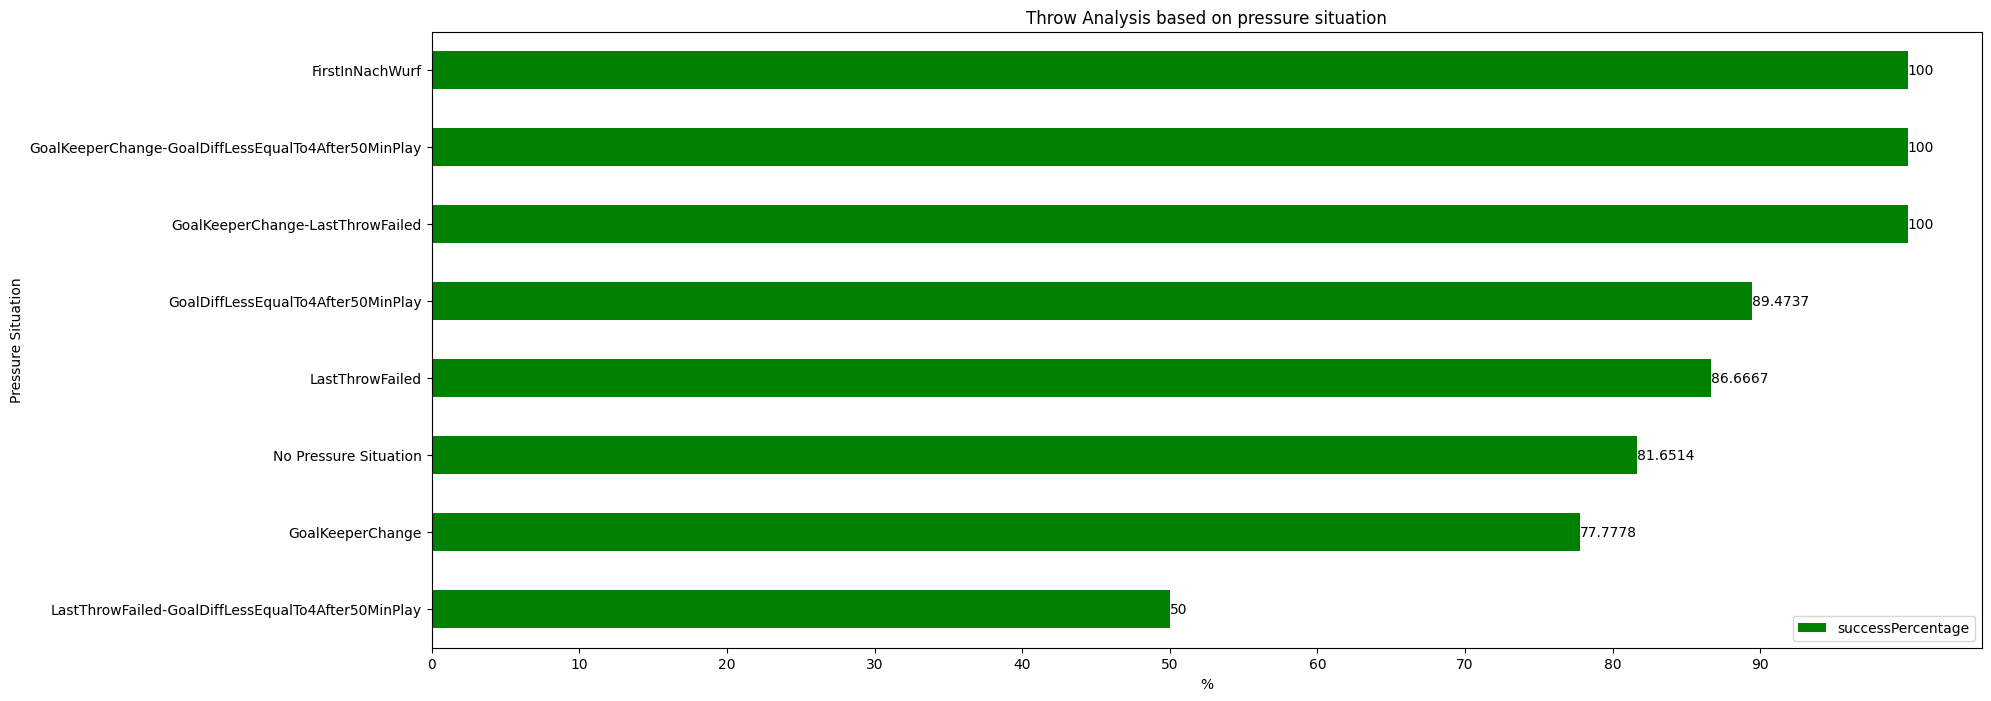

In [12]:

pressureSituation = pd.DataFrame({'PressureSituation':grp,'successPercentage':[(se/te)*100 for se, te in zip(s, t)]})
ax = pressureSituation.sort_values('successPercentage',ascending=True).set_index('PressureSituation')[['successPercentage']].plot.barh( title='Throw Analysis based on pressure situation',color=("green", "red"),xlabel='%', ylabel='Pressure Situation',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])
pressureSituation

Throw Direction

,throwDirection,throwSuccess,Count
0,1.0,0.0,1
1,1.0,1.0,14
2,2.0,0.0,4
3,2.0,1.0,6
4,3.0,0.0,3
5,3.0,1.0,16
6,4.0,0.0,1
7,4.0,1.0,6
8,6.0,0.0,1
9,6.0,1.0,6


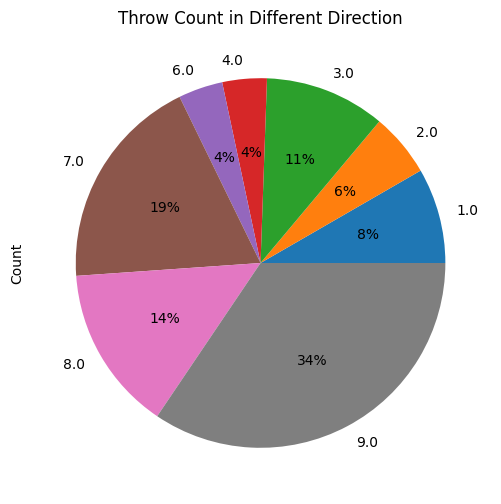

In [13]:
df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(6, 6), title='Throw Count in Different Direction',autopct='%.0f%%',legend=None)
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwDirection'],ascending=True,inplace=True)
df17

Text(0.5, 1.0, '9')

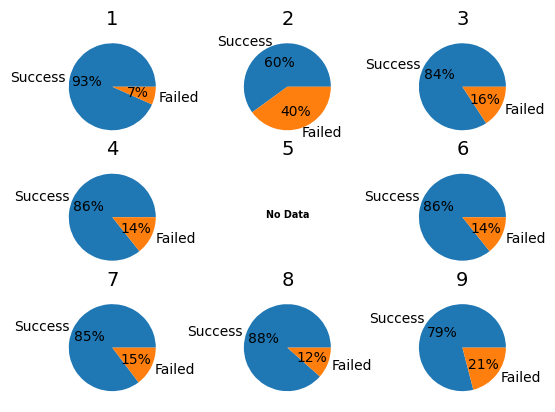

In [20]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)

axs[0, 0].pie([14,1], labels=labels, autopct='%.0f%%' )
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].pie([6,4], labels=labels, autopct='%.0f%%')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].pie([16,3], labels=labels,  autopct='%.0f%%')
axs[0, 2].set_title('3', fontsize=14)

axs[1, 0].pie([6,1], labels=labels, autopct='%.0f%%')
axs[1, 0].set_title('4', fontsize=14)
#axs[1, 1].pie([0,0], labels=labels,  autopct='%.0f%%')
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, 'No Data', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].pie([6,1], labels=labels, autopct='%.0f%%')
axs[1, 2].set_title('6', fontsize=14)

axs[2, 0].pie([29,5], labels=labels,  autopct='%.0f%%')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].pie([23,3], labels=labels, autopct='%.0f%%')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].pie([49,13], labels=labels,  autopct='%.0f%%')
axs[2, 2].set_title('9', fontsize=14)


Text(0.5, 1.0, '9')

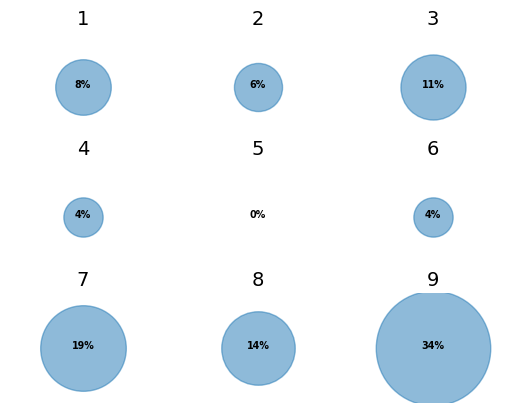

In [21]:

# Make figure and axes
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter([0.5], [0.5],
                 alpha=0.5,
                 s = 8*200)
axs[0, 0].text(0.5, 0.5, '8%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 0].axis('off')
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 6*200)
axs[0, 1].text(0.5, 0.5, '6%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 1].axis('off')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 11*200)
axs[0, 2].text(0.5, 0.5, '11%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 2].axis('off')
axs[0, 2].set_title('3', fontsize=14)



axs[1, 0].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 4*200)
axs[1, 0].text(0.5, 0.5, '4%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 0].axis('off')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 0*200)
axs[1, 1].text(0.5, 0.5, '0%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 1].axis('off')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 4*200)
axs[1, 2].text(0.5, 0.5, '4%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 2].axis('off')
axs[1, 2].set_title('6', fontsize=14)





axs[2, 0].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 19*200)
axs[2, 0].text(0.5, 0.5, '19%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 0].axis('off')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 14*200)
axs[2, 1].text(0.5, 0.5, '14%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 1].axis('off')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 34*200)
axs[2, 2].text(0.5, 0.5, '34%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 2].axis('off')
axs[2, 2].set_title('9', fontsize=14)